In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sys
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression


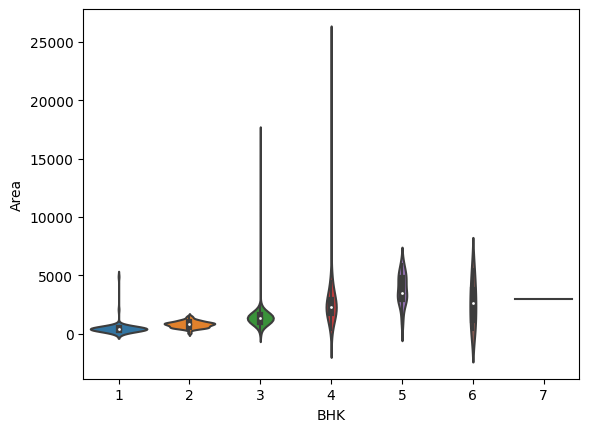

In [197]:

data = pd.read_csv("DataSets/IndianHouses.csv")

data = data.dropna(how="any",axis=0)

def showvilbox(x,colname,colname2):
    
    if x==1:
        sys.violinplot(x=colname,y=colname2,data=data)
    if x==2:
        sys.boxplot(x=colname,y=colanme2,data=data)
    plt.show()



showvilbox(1,"BHK","Area")

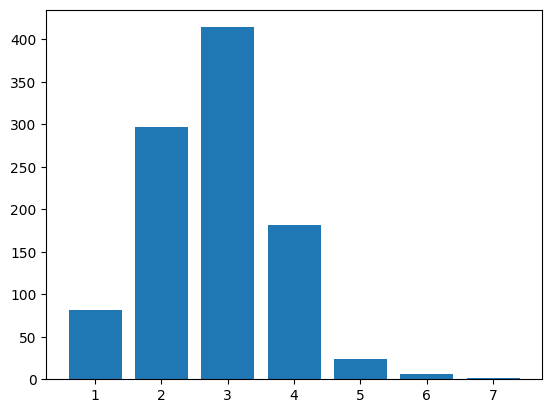

In [198]:


plt.bar(data["BHK"].value_counts().index,data["BHK"].value_counts())
plt.show()

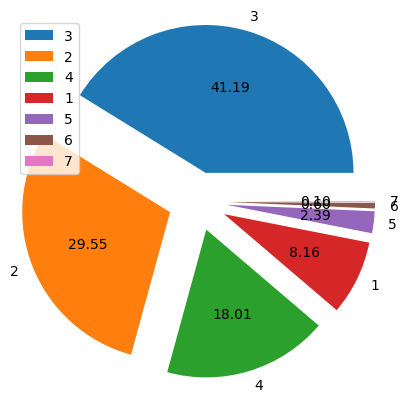

In [199]:
plt.pie(data["BHK"].value_counts(),explode=7*[0.2],autopct="%.2f",labels=data["BHK"].value_counts().index)

plt.legend()

plt.show()

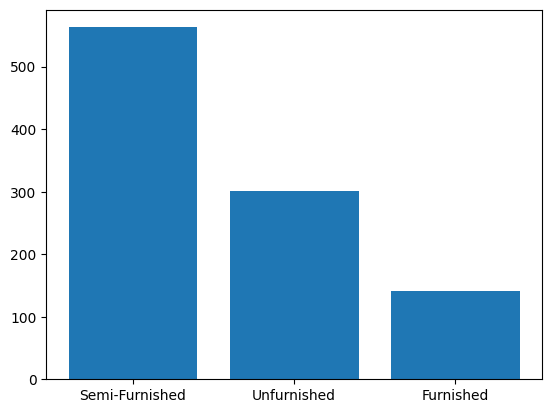

In [200]:
plt.bar(data["Furnishing"].value_counts().index,data["Furnishing"].value_counts())
plt.show()

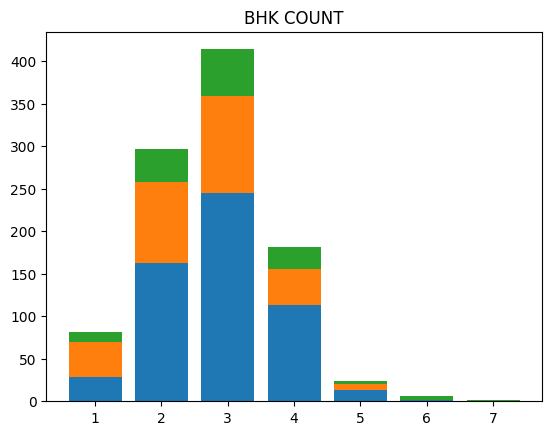

In [201]:
x = data[data["Furnishing"]=="Semi-Furnished"]["BHK"].value_counts().sort_index()
y = data[data["Furnishing"]=="Unfurnished"]["BHK"].value_counts().sort_index()
z = data[data["Furnishing"]=="Furnished"]["BHK"].value_counts().sort_index()

y[6],y[7] = 0,0

x[7] = 0

k = np.zeros(7)

for i in [x,y,z]:
    plt.bar(i.index,i,bottom=k)
    
    plt.title("BHK COUNT")
    k +=i

plt.show()


plt.show()

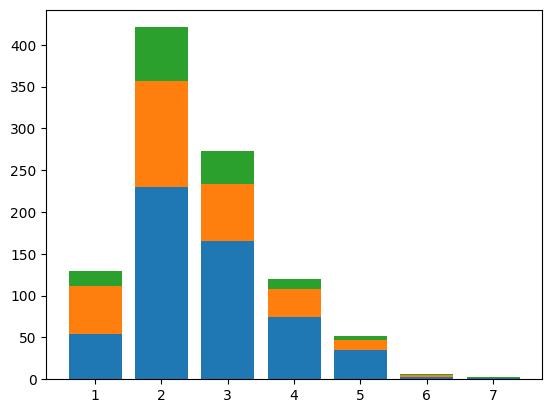

In [202]:
x = data[data["Furnishing"]=="Semi-Furnished"]["Bathroom"].value_counts().sort_index()
y = data[data["Furnishing"]=="Unfurnished"]["Bathroom"].value_counts().sort_index()
z = data[data["Furnishing"]=="Furnished"]["Bathroom"].value_counts().sort_index()

k = np.zeros(7)

for i in [x,y,z]:
    plt.bar(i.index,i,bottom=k)
    k +=i
plt.show()


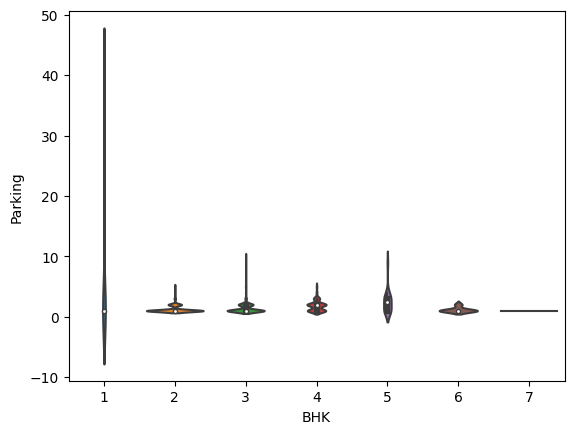

In [203]:
showvilbox(1,"BHK","Parking")

C:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


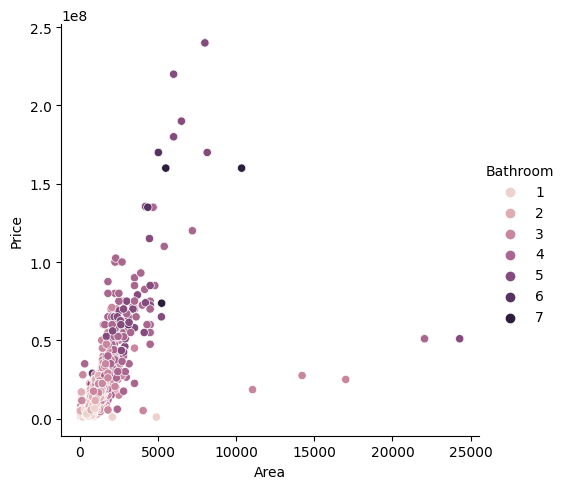

In [204]:
sys.relplot(y="Price",x="Area",data=data,hue="Bathroom")
plt.show()

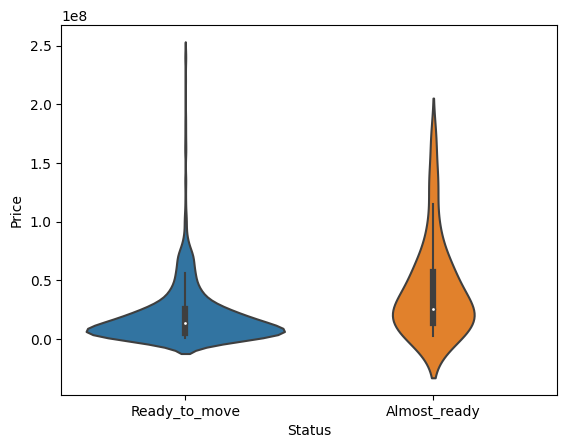

In [205]:

showvilbox(1,"Status","Price")

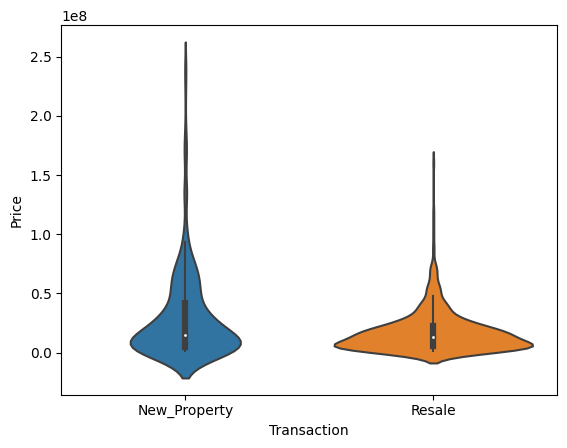

In [206]:

showvilbox(1,"Transaction","Price")

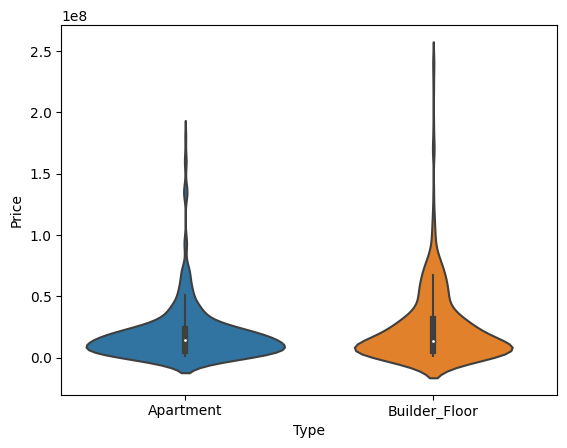

In [207]:

showvilbox(1,"Type","Price")

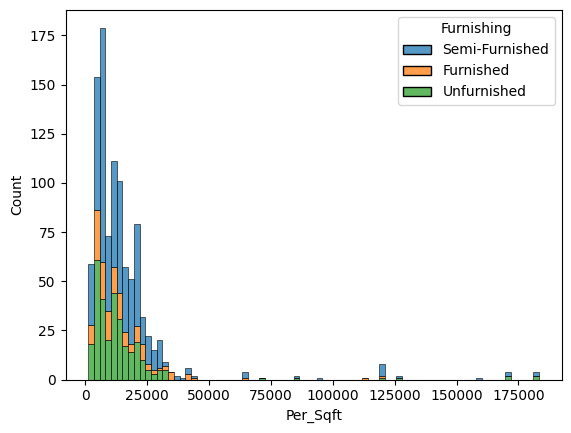

In [208]:
sys.histplot(x="Per_Sqft",multiple="stack",data=data,hue="Furnishing")
plt.show()

In [210]:
for i in ["Area","Price"]:
    data[i] = StandardScaler().fit_transform(data[[i]])

    
    
X = data["Area"]

X = np.array(X).reshape(-1,1)

y = data["Price"]

Xtrain, Xtest , Ytrain, Ytest = train_test_split(X,y,test_size=0.2)

model = LinearRegression()

model.fit(Xtrain,Ytrain)

prediction = model.predict(Xtest)

prediction

err = mean_absolute_error(prediction,Ytest)

err

0.5036121799425857